In [1]:
import pandas as pd

# 1.Descriptive Analytics for Numerical Columns

In [2]:
data=pd.read_csv("sales_data_with_discounts.csv")

In [3]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
data.dtypes#to the the columns with numerical data

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [5]:
data.describe()#show the statistical analysis that is mean,med,std

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [18]:
#brief interpretation of these statistics.

#the dataset is highly right skewed that is mean>median for most of the columns which indicate that only few high values incease the average
#colums like avgprice,total sales,net sales has large standard deviation which shows variation in dtaa


# 2.Data Visualization

array([[<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Avg Price'}>],
       [<AxesSubplot:title={'center':'Total Sales Value'}>,
        <AxesSubplot:title={'center':'Discount Rate (%)'}>],
       [<AxesSubplot:title={'center':'Discount Amount'}>,
        <AxesSubplot:title={'center':'Net Sales Value'}>]], dtype=object)

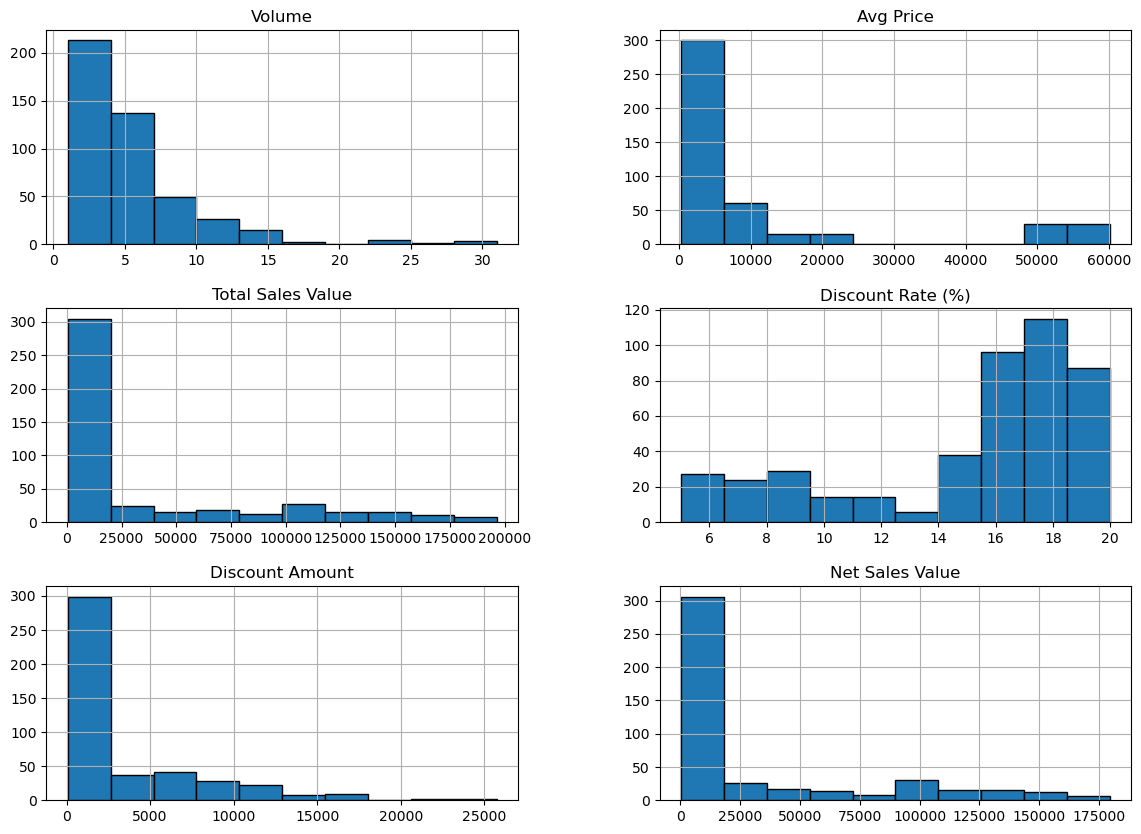

In [29]:
#histogram
data.hist(figsize=(14,10),bins=10,edgecolor="black")

In [30]:
#Inferences from the histogram

#volume is right skewed, most values lie between 1-10 and few beyond indicating ouliers
#avg price is right skewed
#total sales value is also right skewed majority of the is less than 25000


<AxesSubplot:>

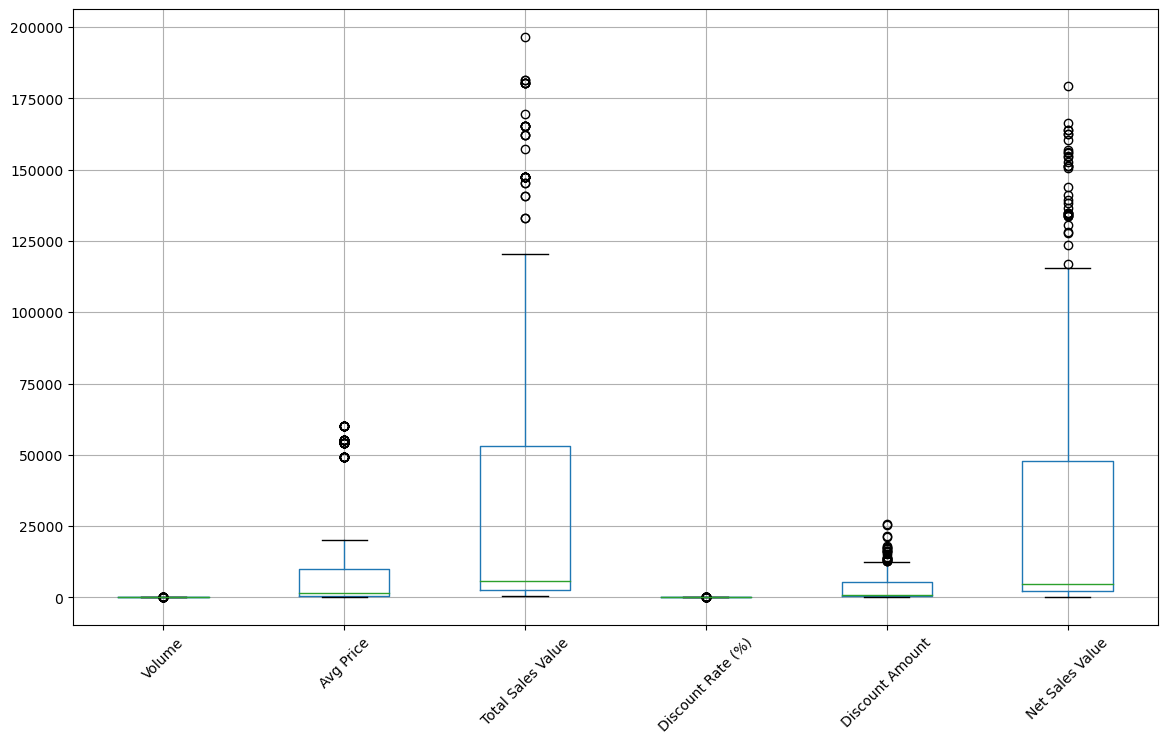

In [32]:
plt.figure(figsize=(14,8))
data.boxplot(rot=45)


In [33]:
#inference from box plot

#columns such as avg, total sales,discount amt,net sales show dots outside the whiskers which represent outliers
#volume and discount rate colums show that the data is consistent

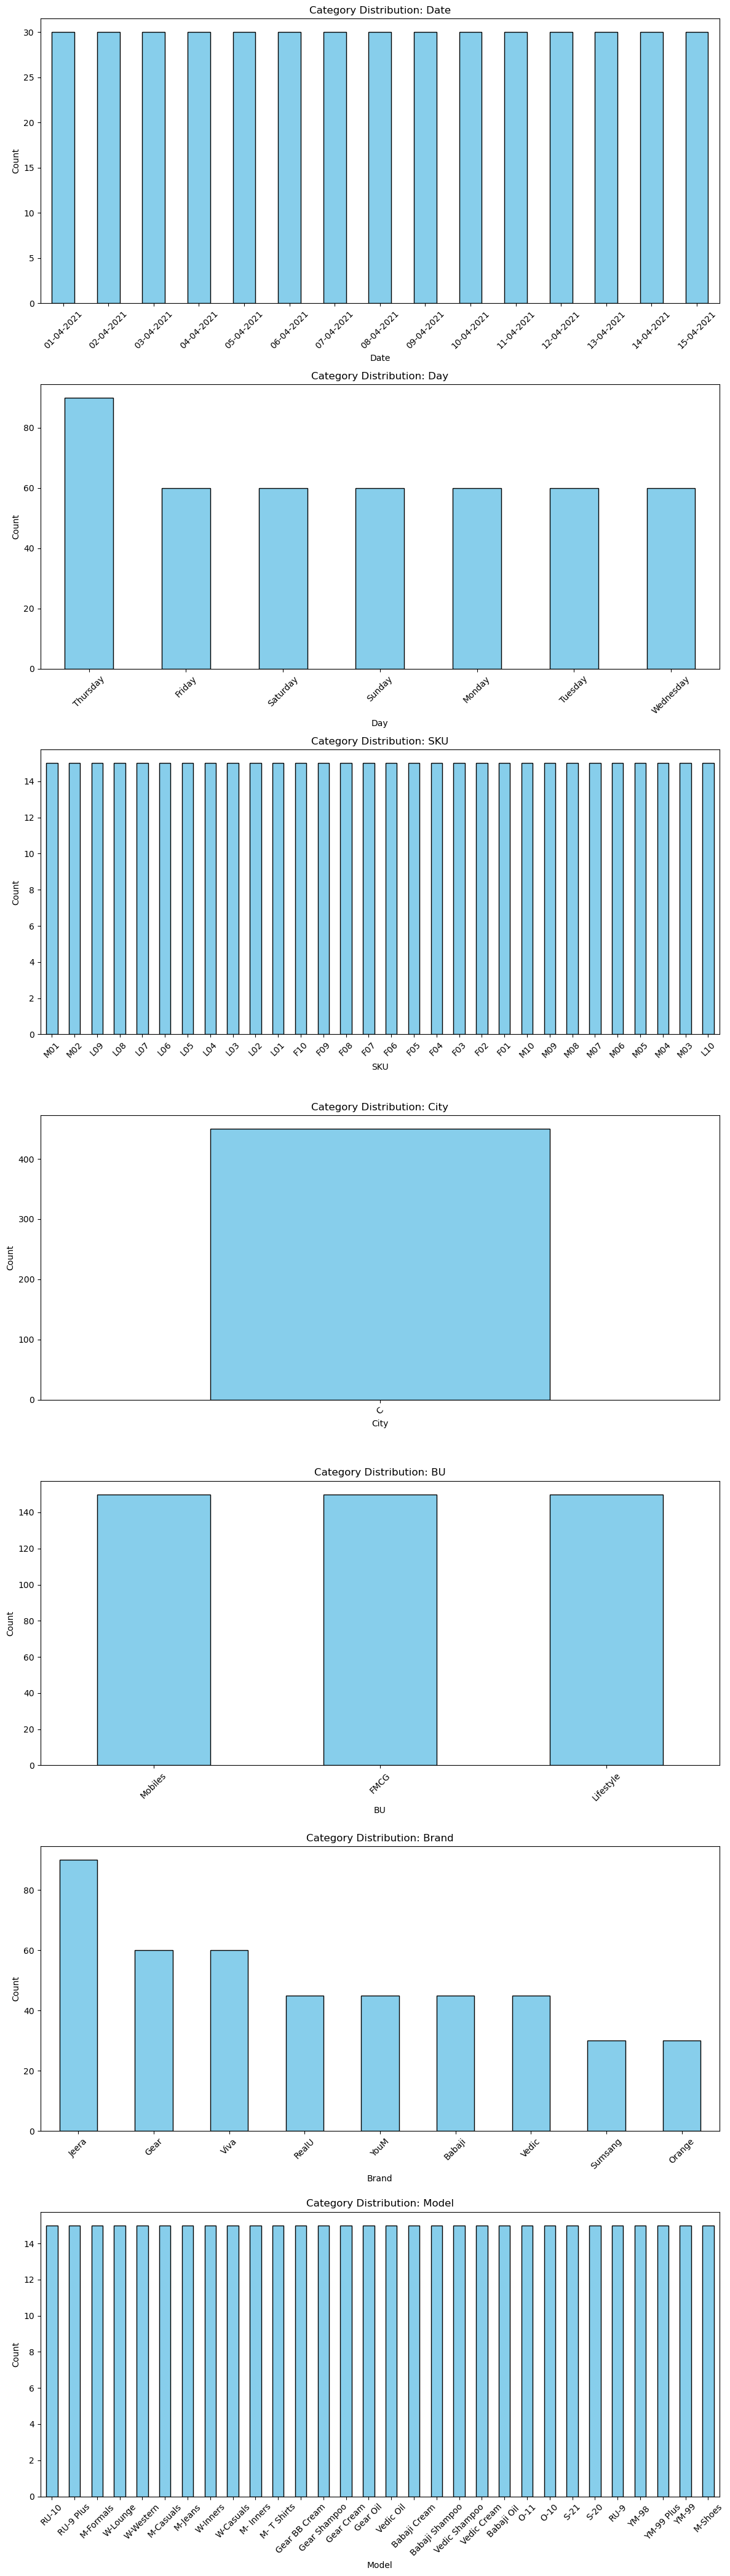

In [48]:
categorical_columns = data.select_dtypes(include=['object']).columns# Identifying the categorical columns

# Ploting bar charts for categorical columns
plt.figure(figsize=(12, 6 * len(categorical_columns)))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Category Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)#rotates xlabels by 45%
plt.tight_layout()#makes sure all the data is properly visible
plt.show()

# 3.Standardization of Numerical Variables

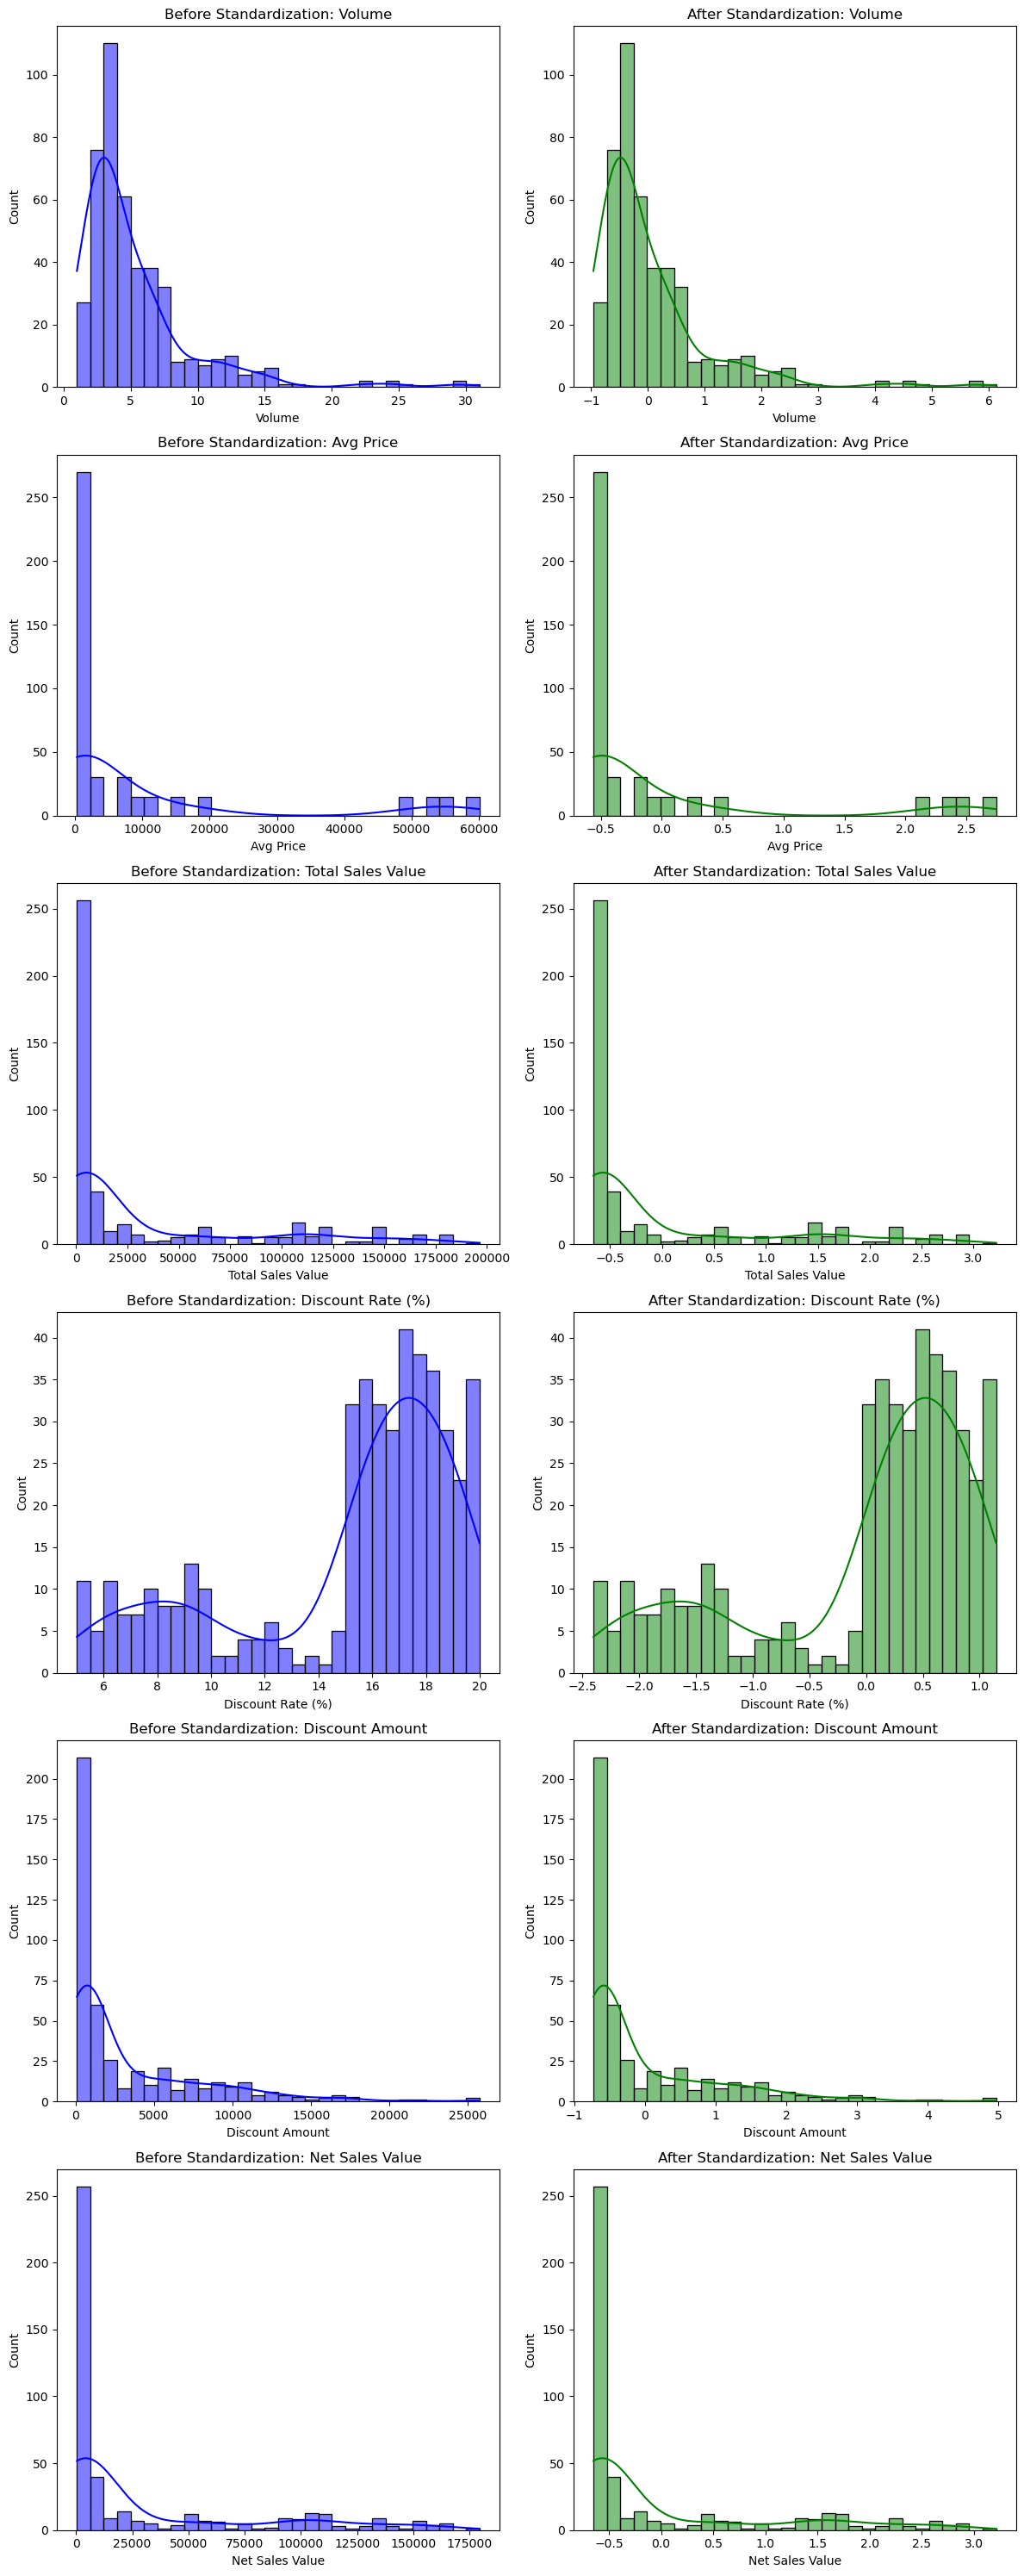

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identifing numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Standardization: (Z-score normalization)
standardized_data = data.copy()
standardized_data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

# Plotting histograms before and after standardization
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Original Data Distribution
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f"Before Standardization: {col}")

    # Standardized Data Distribution
    sns.histplot(standardized_data[col], bins=30, kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f"After Standardization: {col}")

plt.tight_layout()
plt.show()

# 4.Conversion of Categorical Data into Dummy Variables

In [69]:
data.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [68]:
#one hot encoding
categoical_data=data.select_dtypes(include=['object']).columns

encoded_data=pd.get_dummies(data,columns=categoical_data,drop_first=True).astype(int)
encoded_data.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11,21153,160346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11,11676,89323,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9,10657,102042,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6,8364,112235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17,4372,19927,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
